In [121]:
import random
import matplotlib.pyplot as plt
# Parameters for GA
population_size = 100
string_length = 30
mutation_rate = 0.1
crossover_rate = 0.1
generations = 200

In [122]:
# Initialize population
population = [''.join(random.choice('01') for _ in range(string_length)) for _ in range(population_size)]

In [123]:
def deceptive_fitness(individual):
    number_of_ones_in_string = individual.count('1')
    
    if number_of_ones_in_string > 0:
        return number_of_ones_in_string
    else:
        return 2 * len(individual)

In [124]:
def russian_roulette_wheel_selection(population, fitness_values):
    fitness_addedup = sum(fitness_values)
    selection_likelyhood = [fitness / fitness_addedup for fitness in fitness_values]

    # randomly select the strings but weigh them more with size
    selected_indices = random.choices(range(len(population)), weights=selection_likelyhood, k=len(population))

    # Return the selected 
    selected_population = [population[index] for index in selected_indices]
    return selected_population



In [125]:
def mutate(individual):
    mutated_individual = list(individual)
    for i in range(len(mutated_individual)):
        if random.random() < mutation_rate:
            mutated_individual[i] = '1' if individual[i] == '0' else '0'
    return ''.join(mutated_individual)


In [126]:
def crossover(parent_one, parent_two):
    if random.random() < crossover_rate:
        crossover_index_point = random.randint(1, len(parent_one) - 1)
        child_one = parent_one[:crossover_index_point] + parent_two[crossover_index_point:]
        child_two = parent_two[:crossover_index_point] + parent_one[crossover_index_point:]
        return child_one, child_two
    else:
        return parent_one, parent_two


In [127]:
# Main loop
best_fitness_list = []

for generation in range(generations):
    # Calculate fitness for each individual
    fitness_values = [deceptive_fitness(individual) for individual in population]

    # Calculate best fitness
    best_fitness_list.append(max(fitness_values))
    
    # Select parents based on fitness scores from using Roulette Wheel Selection
    selected_population = russian_roulette_wheel_selection(population, fitness_values) 
    # Create the  next generation
    new_population = []
    for i in range(0, population_size, 2):
        parent_one, parent_two = selected_population[i], selected_population[i+1]
        child_one, child_two = crossover(parent_one, parent_two)
        child_one = mutate(child_one)
        child_two = mutate(child_two)
        new_population.extend([child_one, child_two])

    population = new_population


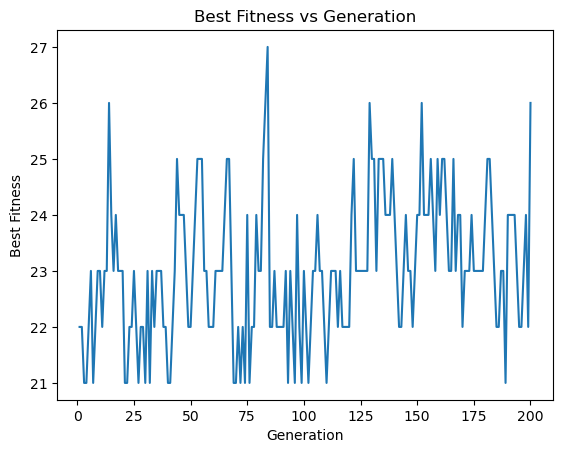

In [128]:
plt.plot(range(1, generations + 1), best_fitness_list)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Best Fitness vs Generation')
plt.show()